In [8]:
#importing important libraries 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
train = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_data = '/content/drive/MyDrive/FruitClassify/Train_Data'
validation = ImageDataGenerator(rescale=1./255)
valid_data = '/content/drive/MyDrive/FruitClassify/Validation_Data'

In [11]:
train_dataset = train.flow_from_directory(train_data, target_size = (150,150), batch_size = 10, class_mode = 'categorical')
validation_dataset = validation.flow_from_directory(valid_data, target_size = (150,150), batch_size = 10, class_mode = 'categorical')

Found 87 images belonging to 10 classes.
Found 88 images belonging to 10 classes.


In [12]:
train_dataset.class_indices

{'Bo': 0,
 'Cam': 1,
 'Chuoi': 2,
 'Duahau': 3,
 'Le': 4,
 'Saurieng': 5,
 'Tao': 6,
 'Thanglong': 7,
 'Vai': 8,
 'Xoai': 9}

In [13]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform',))
model.add(Dense(10,activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                    

In [15]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [16]:
history = model.fit(train_dataset,batch_size=32,epochs=50,verbose=1,validation_data=validation_dataset)

Epoch 1/50
9/9 [==============================] - 52s 5s/step - loss: 2.6397 - accuracy: 0.1034 - val_loss: 2.2871 - val_accuracy: 0.0682
Epoch 2/50
9/9 [==============================] - 2s 218ms/step - loss: 2.3206 - accuracy: 0.0690 - val_loss: 2.2984 - val_accuracy: 0.1705
Epoch 3/50
9/9 [==============================] - 2s 212ms/step - loss: 2.3008 - accuracy: 0.1149 - val_loss: 2.2776 - val_accuracy: 0.1818
Epoch 4/50
9/9 [==============================] - 2s 220ms/step - loss: 2.2808 - accuracy: 0.1609 - val_loss: 2.2596 - val_accuracy: 0.1705
Epoch 5/50
9/9 [==============================] - 2s 223ms/step - loss: 2.2629 - accuracy: 0.1954 - val_loss: 2.2264 - val_accuracy: 0.2159
Epoch 6/50
9/9 [==============================] - 2s 222ms/step - loss: 2.2306 - accuracy: 0.2299 - val_loss: 2.1620 - val_accuracy: 0.2955
Epoch 7/50
9/9 [==============================] - 2s 228ms/step - loss: 2.1518 - accuracy: 0.2529 - val_loss: 2.0451 - val_accuracy: 0.2614
Epoch 8/50
9/9 [======

In [17]:
model.save('/content/drive/MyDrive/FruitClassify/FruitClassification.h5')

In [18]:
classificationFood_model = load_model('/content/drive/MyDrive/FruitClassify/FruitClassification.h5')

In [19]:
score=classificationFood_model.evaluate(validation_dataset,verbose=1)
print('Test loss = ',score[0])
print('Test accuracy = ',score[1])

9/9 [==============================] - 1s 100ms/step - loss: 0.1212 - accuracy: 0.9773
Test loss =  0.12118346244096756
Test accuracy =  0.9772727489471436


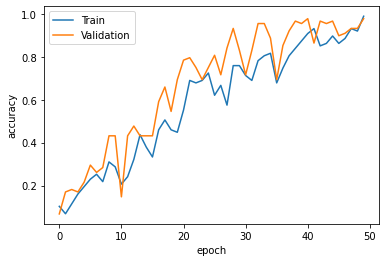

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

Predict is:  Duahau


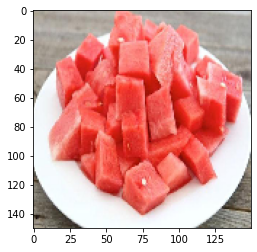

In [23]:
img = load_img('/content/drive/MyDrive/FruitClassify/Pred_Data/duahau.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Bo',
 'Cam',
 'Chuoi',
 'Duahau',
 'Le',
 'Saurieng',
 'Tao',
 'Thanglong',
 'Vai',
 'Xoai']
print('Predict is: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

Predict is:  Cam


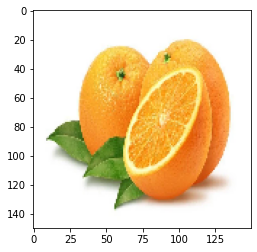

In [25]:
img = load_img('/content/drive/MyDrive/FruitClassify/Pred_Data/cam.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Bo',
 'Cam',
 'Chuoi',
 'Duahau',
 'Le',
 'Saurieng',
 'Tao',
 'Thanglong',
 'Vai',
 'Xoai']
print('Predict is: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

Predict is:  Saurieng


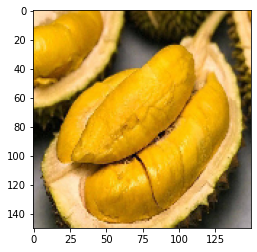

In [26]:
img = load_img('/content/drive/MyDrive/FruitClassify/Pred_Data/duriang.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Bo',
 'Cam',
 'Chuoi',
 'Duahau',
 'Le',
 'Saurieng',
 'Tao',
 'Thanglong',
 'Vai',
 'Xoai']
print('Predict is: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

Predict is:  Bo


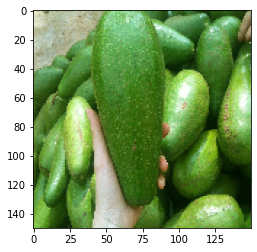

In [27]:
img = load_img('/content/drive/MyDrive/FruitClassify/Pred_Data/bo.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Bo',
 'Cam',
 'Chuoi',
 'Duahau',
 'Le',
 'Saurieng',
 'Tao',
 'Thanglong',
 'Vai',
 'Xoai']
print('Predict is: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

In [28]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('FruitClassify.ipynb')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2022-05-25 03:12:30--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-05-25 03:12:30 (42.4 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/FruitClassify.ipynb to pdf
[NbConvertApp] Support files will be in FruitClassify_files/
[NbConvertApp] Making directory ./FruitClassify_files
[NbConvertApp] Making directory ./F

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'